<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Machine learning is an important decision support tool for crop yield prediction, including supporting decisions on what crops to grow and what to do during the growing season of the crops.</p>
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a crop prediction — from the soil preparation, seeds breeding and water feed measurement — and it ends when robots pick up the harvest determining the ripeness with the help of computer vision.</p><br>

<p style="background-color:#44d180;font-family:newtimeroman;font-size:18px;line-height:1.7em;text-align:center;border-radius:5px 5px">In the crop recommendation, the user can provide the parameters like area,season ,district, year,production, crop from their side and the application will predict which crop should the user grow.</p>

<blockquote><p style="font-size:18px; color:#159364; font-family:verdana;">
<code>AREA</code> – TOTAL AVAILABLE AREA FOR CULTIVATION.</br>
<code>PRODUCTION </code> – PRODUCTION OF CROP IN THAT PARTICULAR YEAR IS GIVEN IN DATASET AND EXPECTED PRODUCTION IS ASKED .</br>
<code>SEASON </code> – SEASONS ARE ALSO RESPONSIBLE FOR PLANT GROWTH .</br></blockquote>

 <a id="1"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Importing Libraries</p>

In [ ]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

 <a id="2"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Loading data</p>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Tamilnadu agriculture yield data.csv to Tamilnadu agriculture yield data.csv


In [ ]:
crop = pd.read_csv('/content/Tamilnadu agriculture yield data.csv')
crop.head(2200)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,NaN
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,NaN
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,NaN
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,NaN
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,NaN
...,...,...,...,...,...,...,...
2195,Tamil Nadu,DINDIGUL,2011,Rabi,Maize,24690,164019.0
2196,Tamil Nadu,DINDIGUL,2011,Rabi,Ragi,1,3.0
2197,Tamil Nadu,DINDIGUL,2011,Rabi,Rapeseed &Mustard,6,1.0
2198,Tamil Nadu,DINDIGUL,2011,Whole Year,Arecanut,48,76.0


In [ ]:
crop['District_Name'].value_counts()

DINDIGUL           600
ERODE              571
SALEM              571
DHARMAPURI         543
COIMBATORE         542
TIRUNELVELI        533
NAMAKKAL           529
VELLORE            521
THENI              520
TIRUCHIRAPPALLI    507
TIRUVANNAMALAI     496
MADURAI            495
VILLUPURAM         494
VIRUDHUNAGAR       493
PERAMBALUR         480
TUTICORIN          476
CUDDALORE          464
KARUR              462
PUDUKKOTTAI        434
SIVAGANGA          422
THANJAVUR          417
KANCHIPURAM        405
THIRUVALLUR        396
RAMANATHAPURAM     377
KRISHNAGIRI        341
NAGAPATTINAM       321
THE NILGIRIS       310
THIRUVARUR         300
KANNIYAKUMARI      254
TIRUPPUR           143
ARIYALUR           130
Name: District_Name, dtype: int64

 <a id="3"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Exploratory Data Analysis</p>

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13547 entries, 0 to 13546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13547 non-null  object 
 1   District_Name  13547 non-null  object 
 2   Crop_Year      13547 non-null  int64  
 3   Season         13547 non-null  object 
 4   Crop           13547 non-null  object 
 5   Area           13547 non-null  int64  
 6   Production     13266 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 741.0+ KB


In [ ]:
crop['Season'].unique()

array(['Kharif', 'Whole Year', 'Rabi'], dtype=object)

In [ ]:
crop['State_Name'] = crop['State_Name'].replace(['Tamil Nadu'],1)
crop['Season'] = crop['Season'].replace(['Kharif', 'Whole Year', 'Rabi'],[1,3,2])
crop['Production'] = crop['Production'].fillna(0)
print(crop)


       State_Name District_Name  Crop_Year  Season           Crop   Area  \
0               1      ARIYALUR       2008       1           Rice  24574   
1               1      ARIYALUR       2008       3      Arhar/Tur    209   
2               1      ARIYALUR       2008       3          Bajra    565   
3               1      ARIYALUR       2008       3         Banana    190   
4               1      ARIYALUR       2008       3      Cashewnut  31113   
...           ...           ...        ...     ...            ...    ...   
13542           1  VIRUDHUNAGAR       2013       3  Small millets   1187   
13543           1  VIRUDHUNAGAR       2013       3      Sugarcane   2917   
13544           1  VIRUDHUNAGAR       2013       3   Sweet potato      4   
13545           1  VIRUDHUNAGAR       2013       3        Tapioca      4   
13546           1  VIRUDHUNAGAR       2013       3       Turmeric      4   

       Production  
0             0.0  
1             0.0  
2             0.0  
3      

In [ ]:
crop.describe()

,State_Name,Crop_Year,Season,Area,Production
count,13547.0,13547.000000,13547.000000,13547.000000,1.354700e+04
mean,1.0,2004.877537,2.248468,7078.900642,8.914478e+05
std,0.0,4.714027,0.942447,20874.776934,2.086803e+07
min,1.0,1997.000000,1.000000,1.000000,0.000000e+00
25%,1.0,2002.000000,1.000000,48.500000,4.300000e+01
50%,1.0,2004.000000,3.000000,624.000000,7.590000e+02
75%,1.0,2009.000000,3.000000,4472.500000,8.529500e+03
max,1.0,2013.000000,3.000000,367554.000000,1.250800e+09


In [ ]:
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
crop.shape

(13547, 7)

In [ ]:
crop['Crop'].unique()

array(['Rice', 'Arhar/Tur', 'Bajra', 'Banana', 'Cashewnut', 'Castor seed',
       'Coconut', 'Coriander', 'Cotton(lint)', 'Dry chillies',
       'Groundnut', 'Jowar', 'Maize', 'Moong(Green Gram)', 'Onion',
       'Ragi', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca',
       'Turmeric', 'Urad', 'Small millets', 'Sesamum', 'Horse-gram',
       'Tobacco', 'Black pepper', 'Cardamom', 'Gram', 'Pulses total',
       'Total foodgrain', 'Wheat', 'Sannhamp', 'Korra', 'Samai',
       'Guar seed', 'Other Cereals & Millets', 'Other Kharif pulses',
       'Rapeseed &Mustard', 'Varagu', 'Arecanut', 'Ash Gourd',
       'Beans & Mutter(Vegetable)', 'Beet Root', 'Bhindi', 'Bitter Gourd',
       'Bottle Gourd', 'Brinjal', 'Cauliflower', 'Citrus Fruit',
       'Cucumber', 'Drum Stick', 'Garlic', 'Grapes', 'Jack Fruit',
       'Lab-Lab', 'Mango', 'Orange', 'Other Citrus Fruit',
       'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Pome Fruit',
       'Pome Granet', 'Redish', 'Ribed Guard', 'Sn

In [ ]:
crop['Production'] = crop['Production'].astype(float)

In [ ]:
crop['Crop'].nunique()

87

In [ ]:
crop['Crop'].value_counts()

Groundnut            546
Cotton(lint)         512
Urad                 510
Moong(Green Gram)    500
Rice                 498
                    ... 
Litchi                 6
Apple                  4
Peach                  4
Turnip                 2
Jute                   2
Name: Crop, Length: 87, dtype: int64

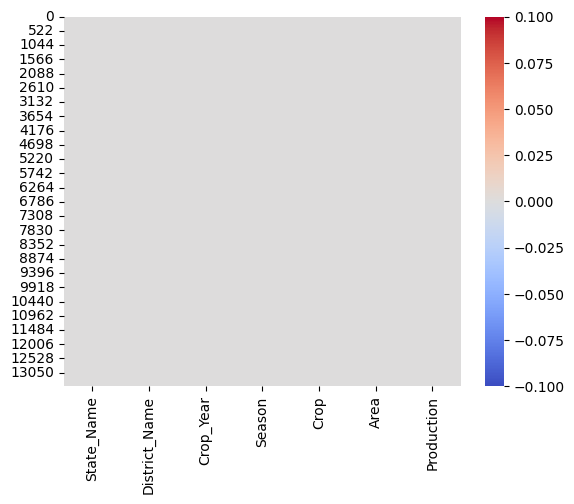

In [ ]:
sns.heatmap(crop.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='Area', ylabel='Density'>

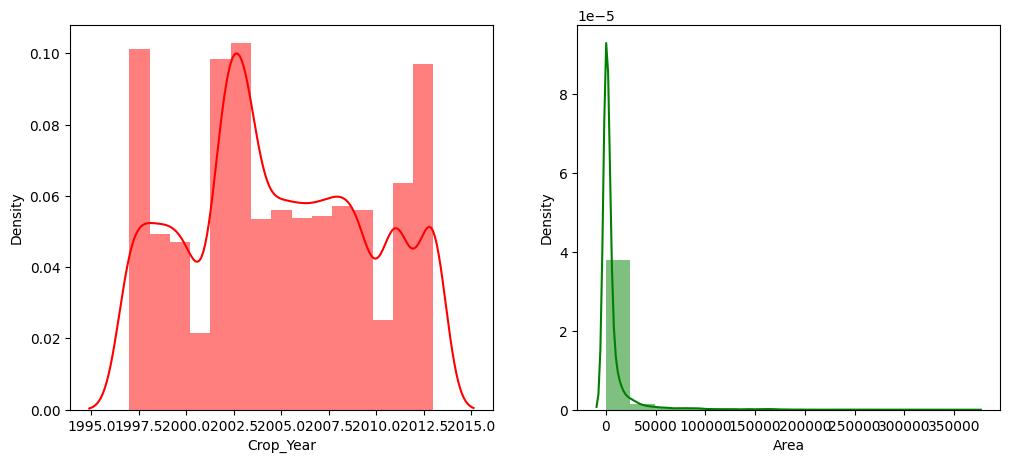

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['Crop_Year'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['Area'],color="green",bins=15,hist_kws={'alpha':0.5})

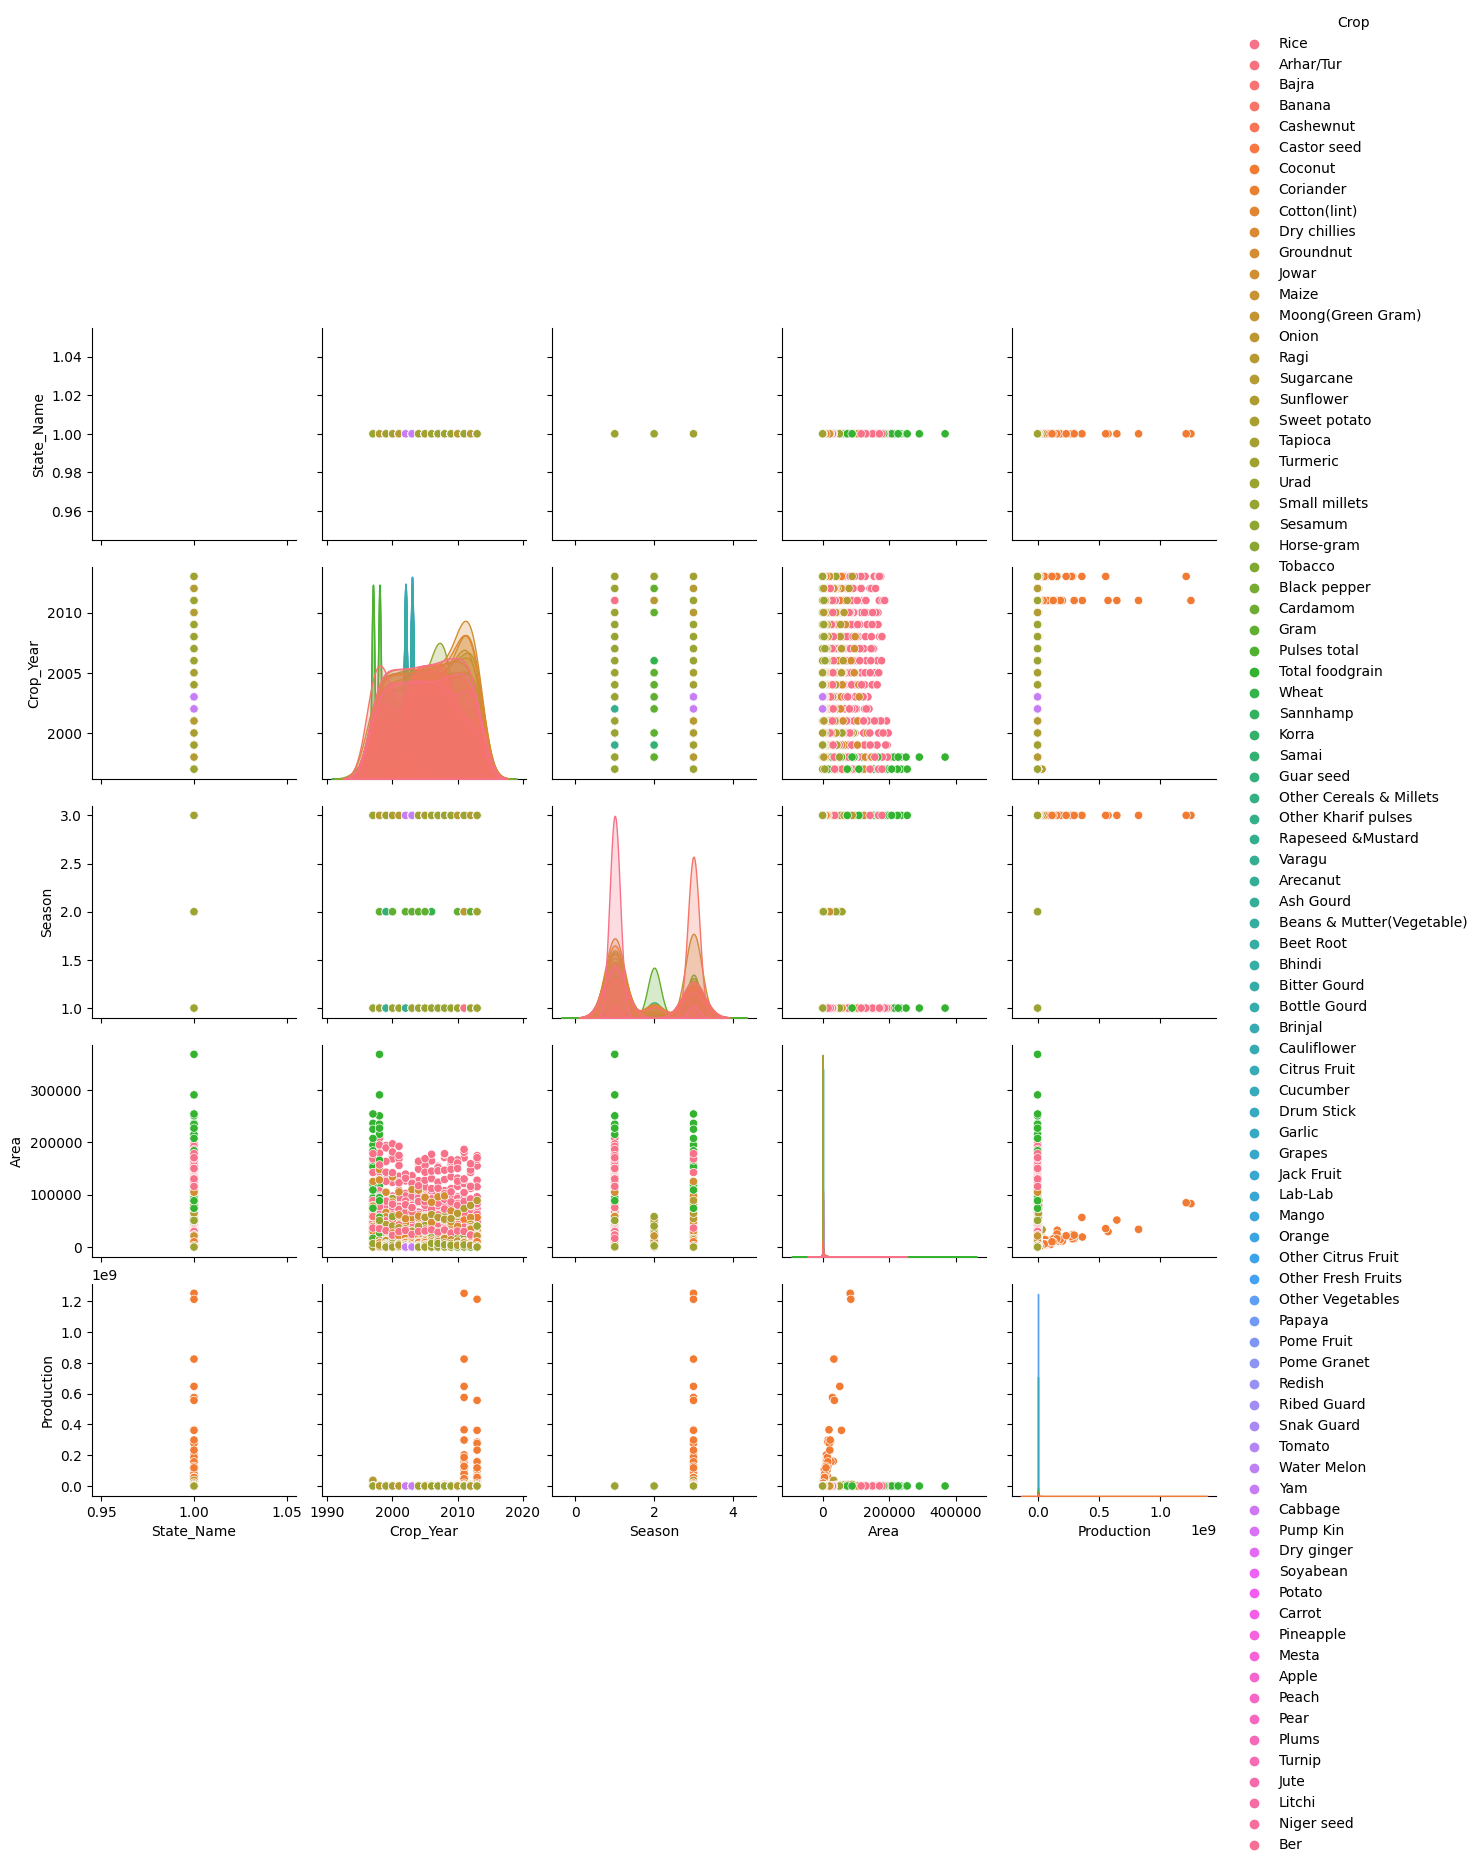

In [ ]:
sns.pairplot(crop,hue = 'Crop')

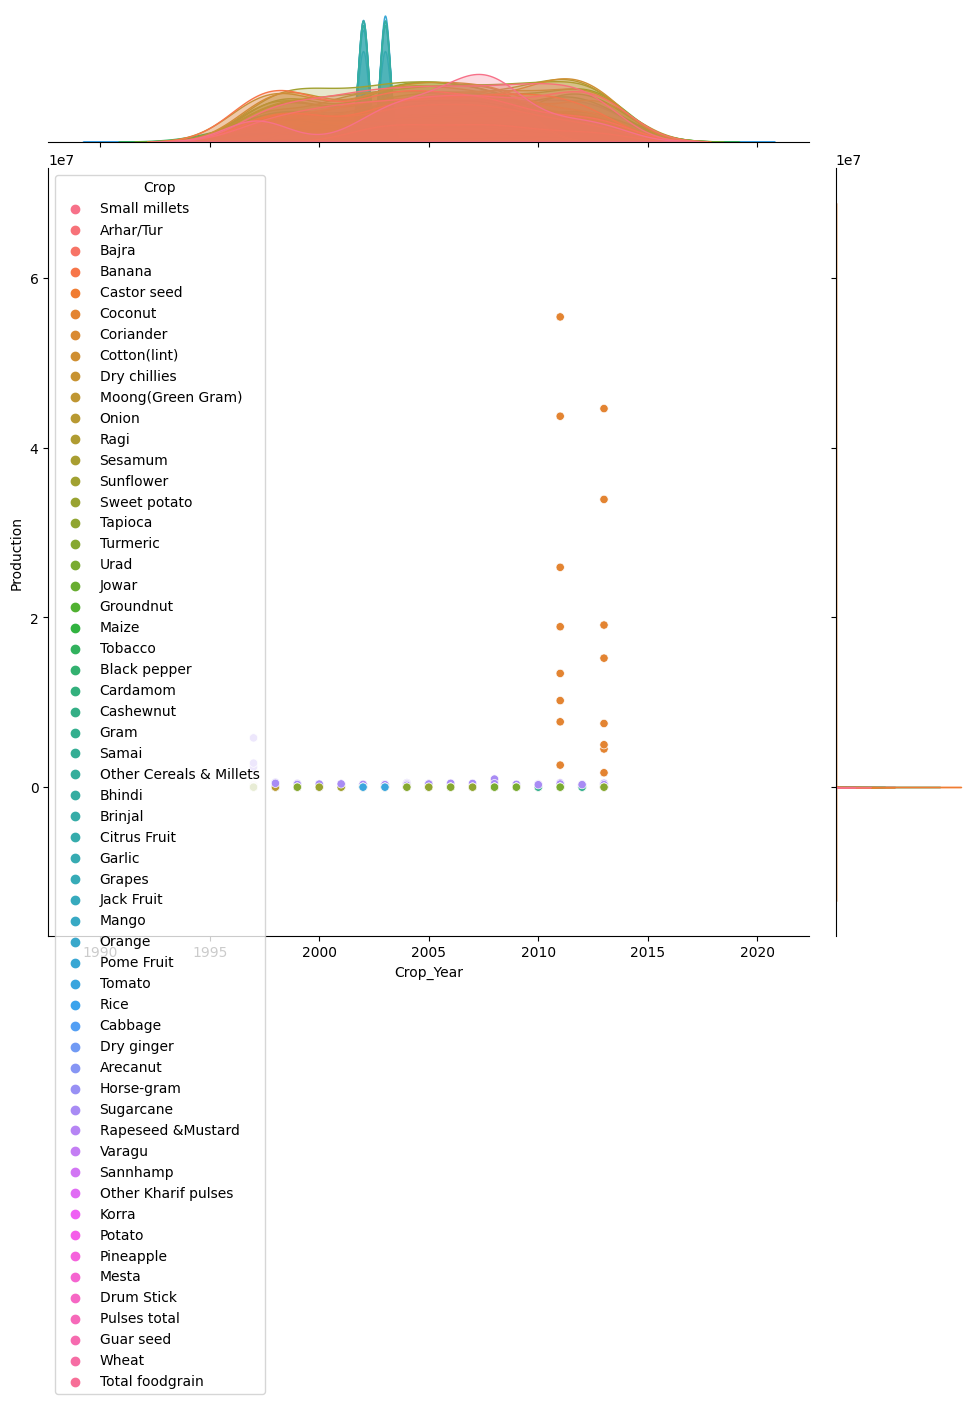

In [ ]:
sns.jointplot(x="Crop_Year",y="Production",data=crop[(crop['Area']<4472.5) &
                                                  (crop['Production']>5.70)],height=10,hue="Crop")

<Axes: xlabel='Crop', ylabel='Crop_Year'>

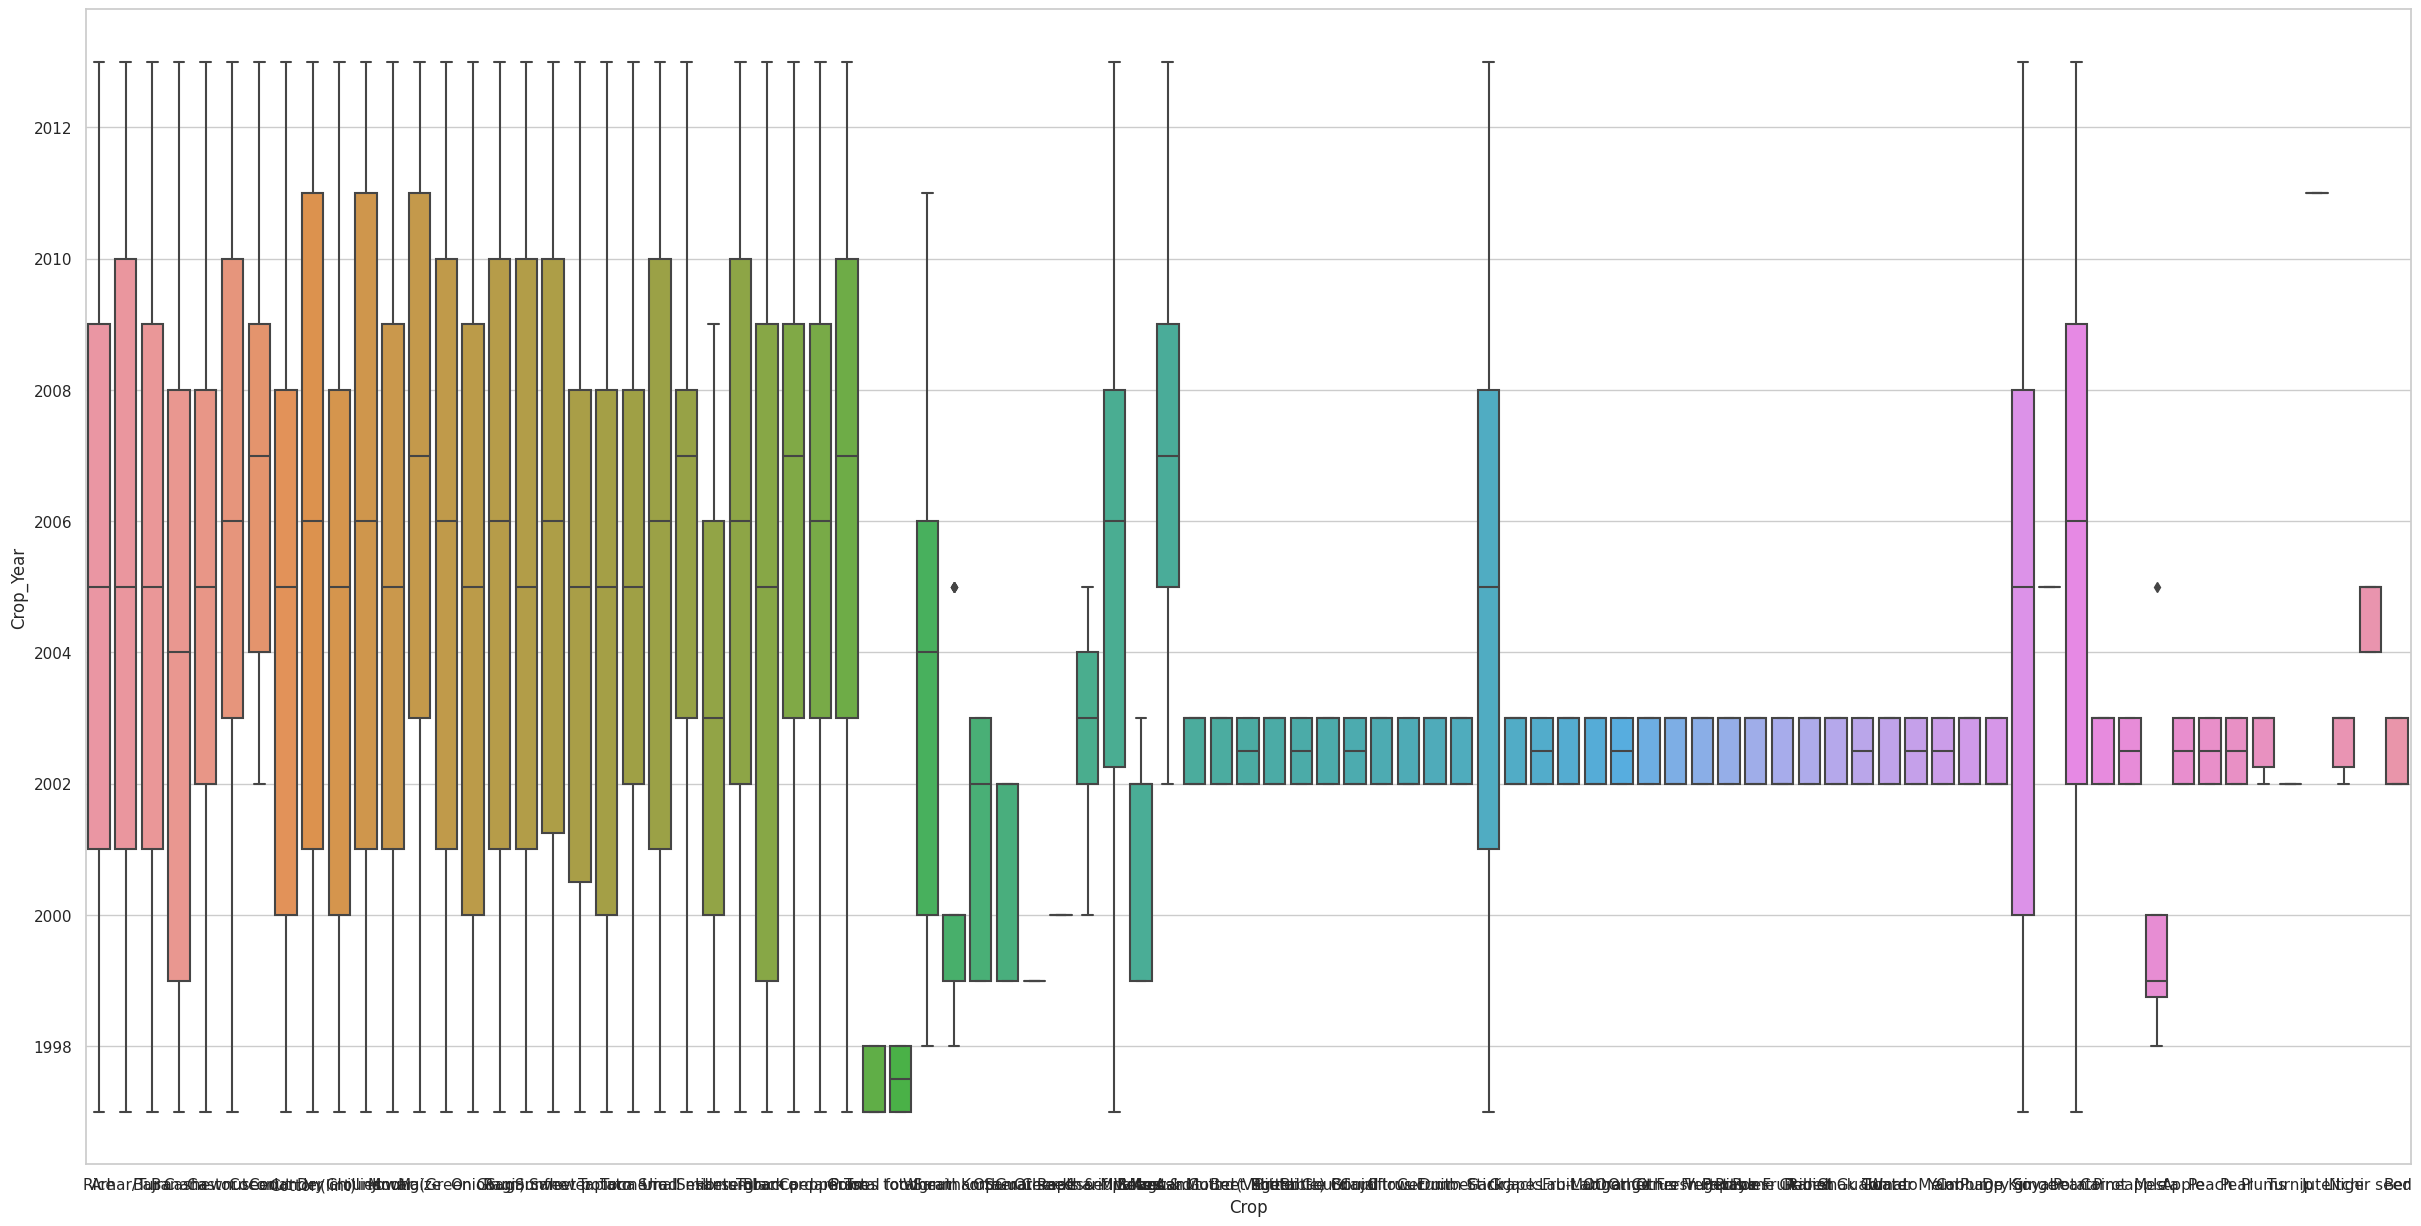

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='Crop',y='Crop_Year',data=crop)

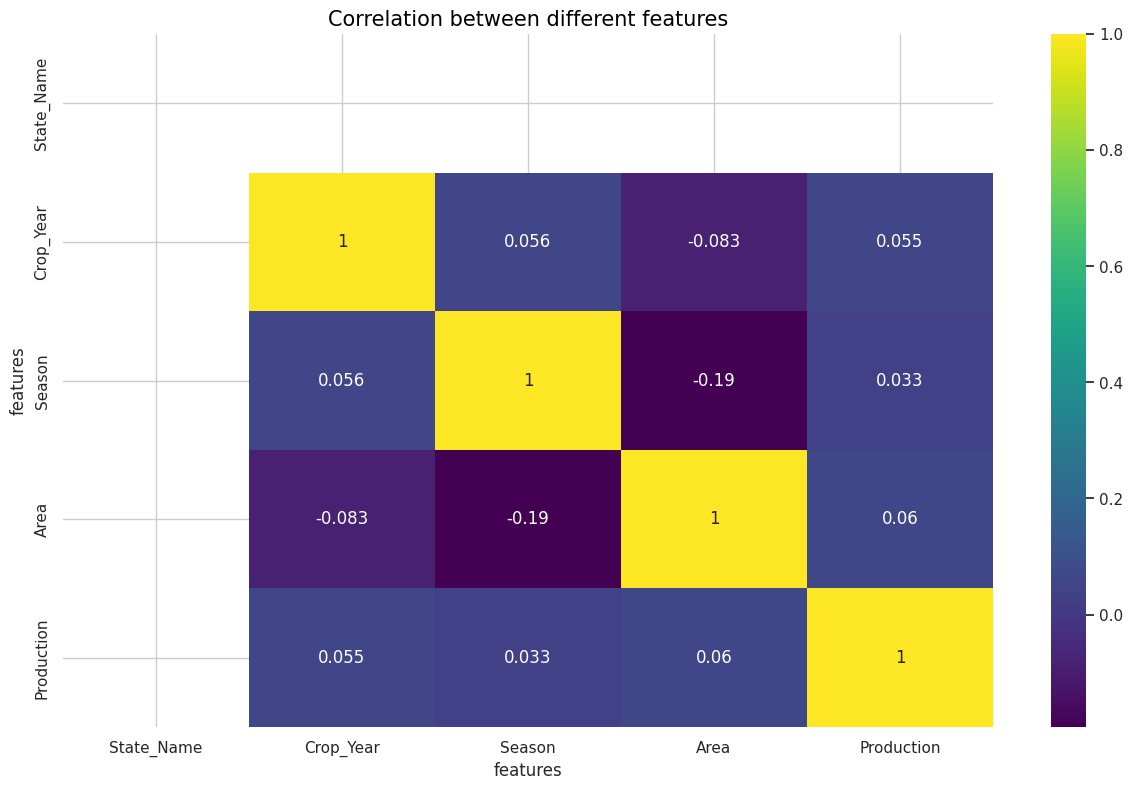

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
crop_summary = pd.pivot_table(crop,index=['Crop'],aggfunc='mean')
crop_summary.head()

,Area,Crop_Year,Production,Season,State_Name
Crop,,,,,
Apple,2.250000,2002.500000,0.000000,3.000000,1
Arecanut,259.981221,2007.140845,405.145540,3.000000,1
Arhar/Tur,2030.875000,2005.291667,1447.224769,1.833333,1
Ash Gourd,37.363636,2002.590909,0.000000,3.000000,1
Bajra,3915.807143,2005.230952,5476.409524,1.697619,1


 <a id="4"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Feature Selection</p>

In [ ]:
features = crop[['State_Name', 'Crop_Year', 'Season', 'Area',
       'Production']]
target = crop['Crop']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

 <a id="5"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Modeling Classification algorithms</p>

 <a id="5.1"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:120%;text-align:center;border-radius:60px 40px;">K-Nearest Neighbors</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.27970479704797047
                           precision    recall  f1-score   support

                 Arecanut       0.14      0.26      0.18        53
                Arhar/Tur       0.12      0.28      0.17        76
                Ash Gourd       0.05      0.14      0.07         7
                    Bajra       0.10      0.15      0.12        84
                   Banana       0.50      0.70      0.58        82
Beans & Mutter(Vegetable)       0.00      0.00      0.00         6
                Beet Root       0.00      0.00      0.00         2
                      Ber       0.00      0.00      0.00         1
                   Bhindi       0.15      0.13      0.14        15
             Bitter Gourd       0.19      0.21      0.20        14
             Black pepper       0.27      0.40      0.32        30
             Bottle Gourd       0.07      0.17      0.10         6
                  Brinjal       0.00      0.00      0.00        10
                  Cabba

In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.26642066 0.26420664 0.25101513 0.26762643 0.26836471]


In [ ]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.4977392267232629
knn_test_accuracy =  0.27970479704797047


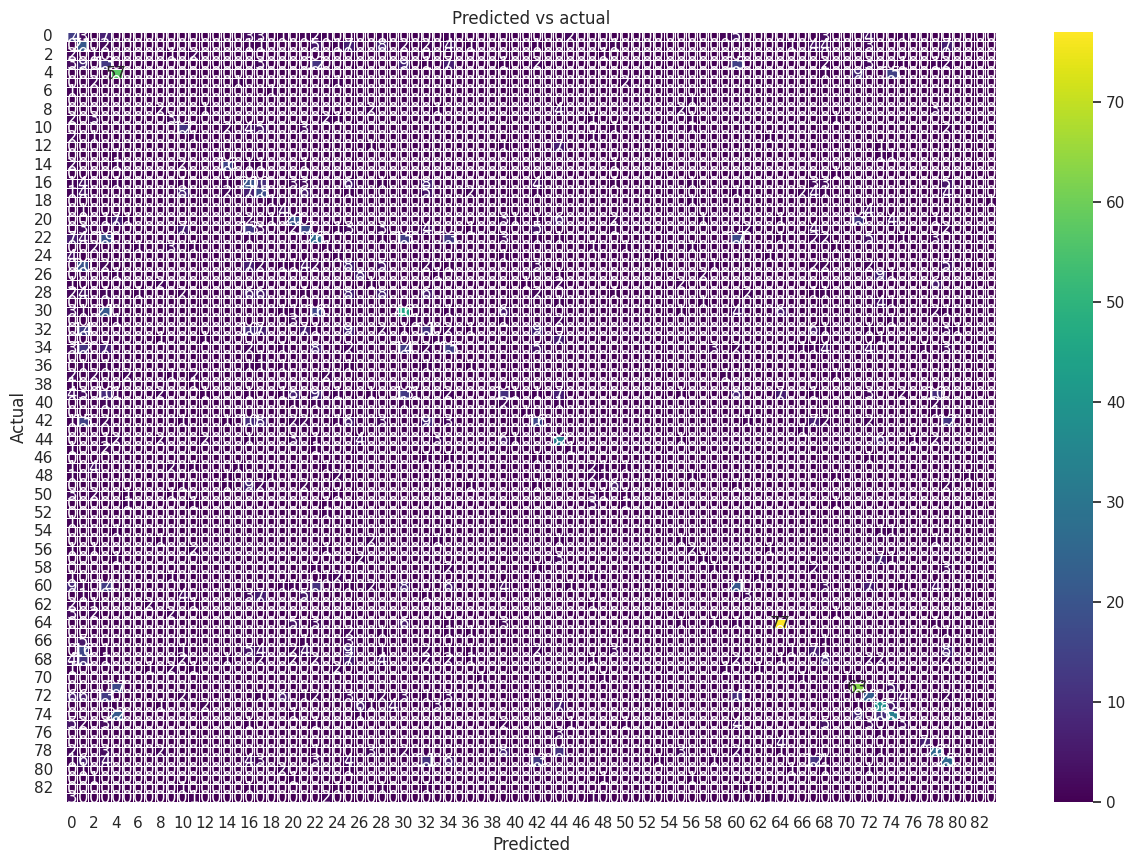

In [ ]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

 <a id="5.1.1"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:120%;text-align:center;border-radius:60px 40px;">Hyperparameter Tuning</p>

<div style="font-size:15px; font-family:verdana;">One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.<br>
</div>

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.30885609, 0.27859779, 0.27712177, 0.28634686, 0.2797048 ,
       0.27896679, 0.27601476, 0.2697417 , 0.27306273, 0.27158672,
       0.26937269, 0.27306273, 0.27527675, 0.28154982, 0.2804428 ,
       0.28302583, 0.28302583, 0.28597786, 0.28523985, 0.28634686])

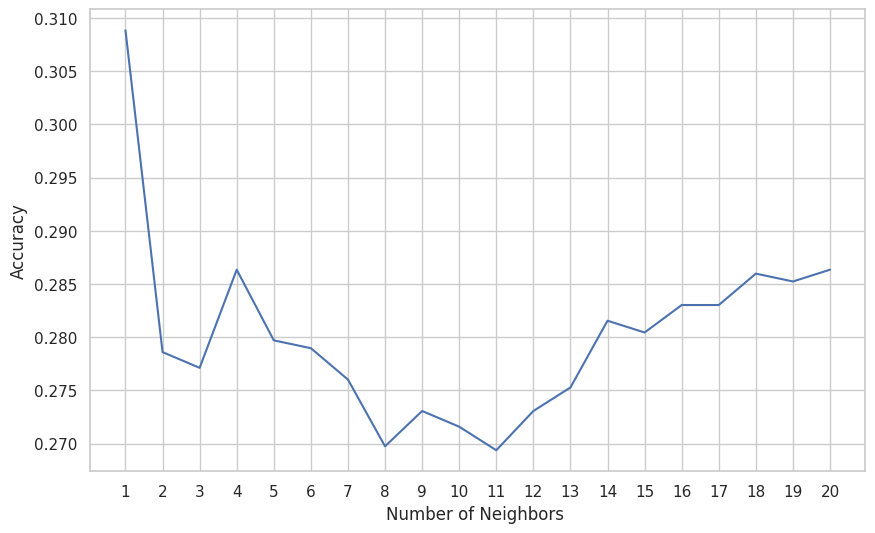

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

<div style="font-size:18px; font-family:verdana;">We will use three hyperparamters- n-neighbors, weights and metric:<br>

* n_neighbors: Decide the best k based on the values we have computed earlier.
* weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their               distances meaning nearer points will have more weight than the farther points.
* metric: The distance metric to be used will calculating the similarity

</div>


In [ ]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
g_res.best_score_

0.33062672456431424

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

In [ ]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [ ]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  0.9470333118021592
knn_test_accuracy =  0.3291512915129151


 <a id="5.2"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Decision Tree</p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  20.59040590405904
                           precision    recall  f1-score   support

                 Arecanut       0.00      0.00      0.00        53
                Arhar/Tur       0.00      0.00      0.00        76
                Ash Gourd       0.00      0.00      0.00         7
                    Bajra       0.11      0.06      0.08        84
                   Banana       0.44      0.80      0.57        82
Beans & Mutter(Vegetable)       0.00      0.00      0.00         6
                Beet Root       0.00      0.00      0.00         2
                      Ber       0.00      0.00      0.00         1
                   Bhindi       0.00      0.00      0.00        15
             Bitter Gourd       0.00      0.00      0.00        14
             Black pepper       0.12      0.10      0.11        30
             Bottle Gourd       0.00      0.00      0.00         6
                  Brinjal       0.00      0.00      0.00        10
             

In [ ]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.21660517 0.20590406 0.18309339 0.18936877 0.18530823]


In [ ]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.21971025191473656
Testing accuracy =  0.2059040590405904


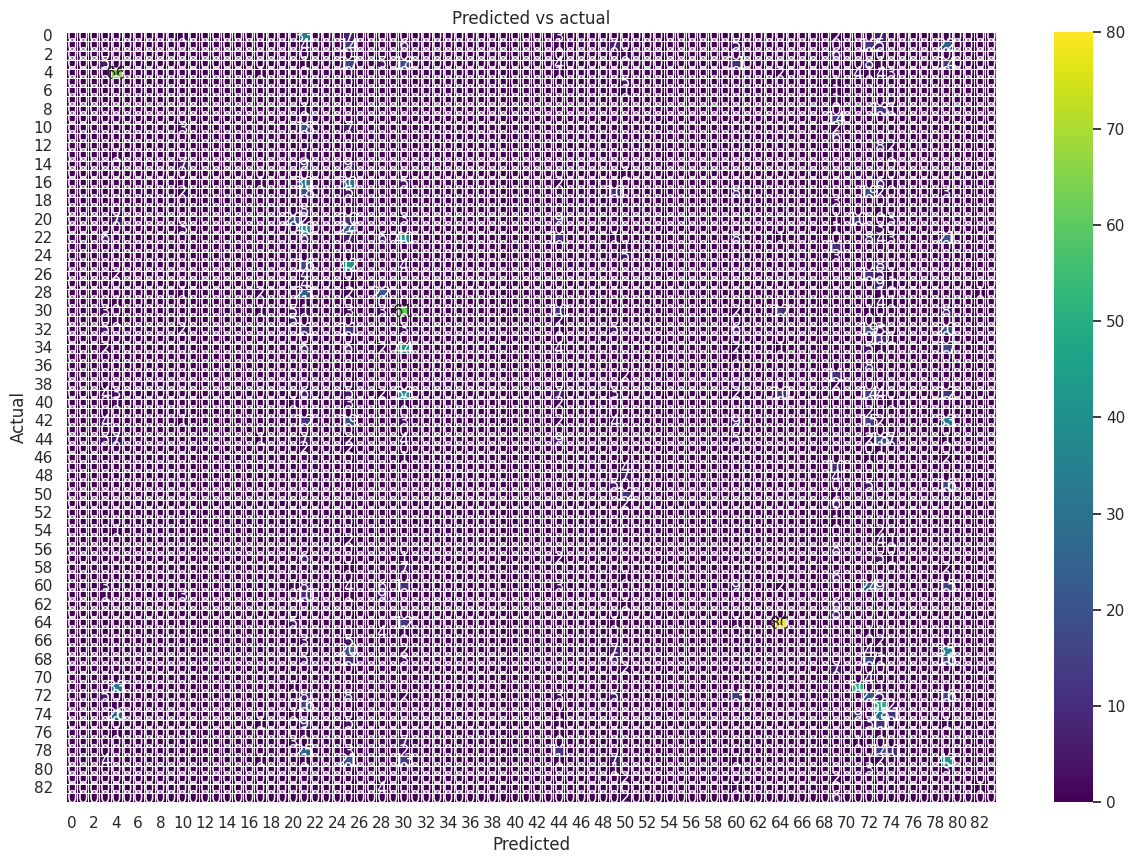

In [ ]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

 <a id="5.3"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Random Forest</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

NameError: ignored

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

In [ ]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

In [ ]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
X=x_train[:10]
Y=y_train[:10]

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,Y)
tree.plot_tree(clf)



In [ ]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("state crop prediction")

 <a id="5.4"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Naive Bayes Classifier</p>

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.14095940959409595
                           precision    recall  f1-score   support

                 Arecanut       0.00      0.00      0.00        53
                Arhar/Tur       0.03      0.07      0.04        76
                Ash Gourd       0.00      0.00      0.00         7
                    Bajra       0.00      0.00      0.00        84
                   Banana       0.51      0.56      0.53        82
Beans & Mutter(Vegetable)       0.00      0.00      0.00         6
                Beet Root       0.00      0.00      0.00         2
                      Ber       0.00      0.00      0.00         1
                   Bhindi       0.00      0.00      0.00        15
             Bitter Gourd       0.00      0.00      0.00        14
             Black pepper       0.00      0.00      0.00        30
             Bottle Gourd       0.00      0.00      0.00         6
                  Brinjal       0.00      0.00      0.00        10
               

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.15793358 0.12619926 0.11997047 0.11590993 0.14027316]


In [ ]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.1387837962535757
Testing accuracy =  0.14095940959409595


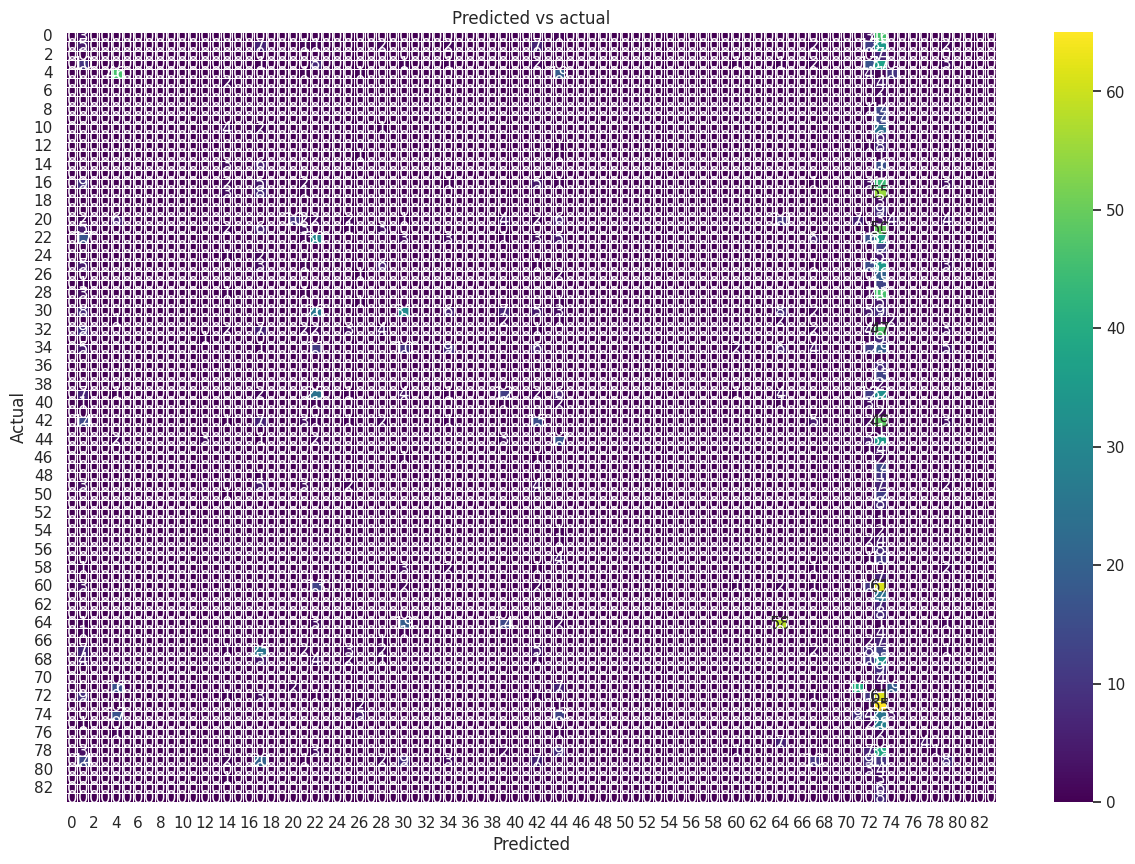

In [ ]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

 <a id="5.5"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;"> eXtreme Gradient Boosting (XGBoost)</p>

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

ValueError: ignored

In [ ]:
score = cross_val_score(XB,features,target,cv=5)
print('Cross validation score: ',score)

In [ ]:
#Print Train Accuracy
XB_train_accuracy = XB.score(x_train,y_train)
print("Training accuracy = ",XB.score(x_train,y_train))
#Print Test Accuracy
XB_test_accuracy = XB.score(x_test,y_test)
print("Testing accuracy = ",XB.score(x_test,y_test))

In [ ]:
y_pred = XB.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

 <a id="6"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Accuracy comparison</p>

In [ ]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

#output

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def cropprediction(State_Name,District_Name,Crop_Year,Season, Available_Area, Assume_Production):
 #'enter the no 1 for tamil nadu and 0 for other','enter the district','enter the year','enter the number \n 1 for kharib \n 2 for rabi \n 3 for whole year','enter the total available area','enter your assume production'
 # x = np.array(['enter the no 1 for tamil nadu and 0 for other','enter the district','enter the year','enter the number \n 1 for kharib \n 2 for rabi \n 3 for whole year','enter the total available area','enter your assume production'])
  ypred=RF.predict([[State_Name,Crop_Year,Season,Area,Production]])
  return ypred

In [ ]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=cropprediction, inputs=['number','text','number','number','number','number'], outputs=outputs,description="This is a crop prediction model  Important points (a) enter 1 for tamil nadu state and 0 for other (b) 1 for Khabif,2 for rabi,3 for whole season")

In [ ]:
app.launch()